<a href="https://colab.research.google.com/github/DAbhishek02/artificial-intelligence-project/blob/main/MOVIE_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install -q numpy pandas matplotlib plotly wordcloud scikit-learn

In [ ]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

In [ ]:
netflix_data = pd.read_csv("/content/movies.csv")
netflix_data.head()

movieId                               title  \
0      1.0                    Toy Story (1995)   
1      2.0                      Jumanji (1995)   
2      3.0             Grumpier Old Men (1995)   
3      4.0            Waiting to Exhale (1995)   
4      5.0  Father of the Bride Part II (1995)   

                                        genres  userId  movieId.1  rating  \
0  Adventure|Animation|Children|Comedy|Fantasy       1        296     5.0   
1                   Adventure|Children|Fantasy       1        306     3.5   
2                               Comedy|Romance       1        307     5.0   
3                         Comedy|Drama|Romance       1        665     5.0   
4                                       Comedy       1        899     3.5   

    timestamp  
0  1147880044  
1  1147868817  
2  1147868828  
3  1147878820  
4  1147868510

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   movieId    62423 non-null    float64
 1   title      62423 non-null    object 
 2   genres     62423 non-null    object 
 3   userId     1048575 non-null  int64  
 4   movieId.1  1048575 non-null  int64  
 5   rating     1048575 non-null  float64
 6   timestamp  1048575 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 56.0+ MB


In [ ]:
netflix_data.isnull().sum()

movieId      986152
title        986152
genres       986152
userId            0
movieId.1         0
rating            0
timestamp         0
dtype: int64

In [ ]:
netflix_data.fillna('', inplace=True)

In [ ]:
netflix_data.describe(include='all').T

count unique  top    freq               mean               std  \
movieId      1048575  62424       986152                NaN               NaN   
title        1048575  62326       986152                NaN               NaN   
genres       1048575   1640       986152                NaN               NaN   
userId     1048575.0    NaN  NaN     NaN        3575.093078        2016.41988   
movieId.1  1048575.0    NaN  NaN     NaN       21192.019575      39119.927522   
rating     1048575.0    NaN  NaN     NaN           3.535808          1.056276   
timestamp  1048575.0    NaN  NaN     NaN  1209524484.396547  230068378.906106   

                   min          25%           50%           75%           max  
movieId            NaN          NaN           NaN           NaN           NaN  
title              NaN          NaN           NaN           NaN           NaN  
genres             NaN          NaN           NaN           NaN           NaN  
userId             1.0       1843.0        3609.0        5322.0        7045.0  
movieId.1          1.0       1148.0        2858.0        8464.0      209163.0  
rating             0.5          3.0           3.5           4.0           5.0  
timestamp  789652009.0  999970697.0  1183781573.0  1446631525.0  1574288328.0

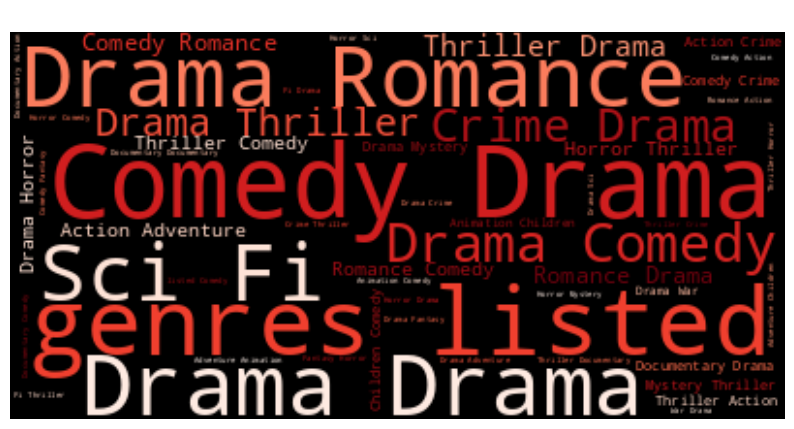

In [ ]:
netflix_data = pd.read_csv("/content/movies.csv")

titles = netflix_data['genres'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()

In [ ]:
movie_counts = netflix_data['title'].value_counts().sort_index()
fig = go.Figure(data=go.Bar(x=movie_counts.index, y=movie_counts.values))
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Movie Releases Per Year',
    title_font=dict(size=24, color='lightgreen', family='Times New Roman'),
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Movies')
)
fig.update_traces(marker_color='lightblue')
fig.show()

In [ ]:
movie_type_counts = netflix_data['genres'].value_counts()

fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))

fig.update_layout(
    plot_bgcolor='rgb(10, 10, 10)',
    paper_bgcolor='rgb(10, 10, 10)',
    font_color='white',
    title='Distribution of c. Types',
)
fig.update_traces(marker=dict(colors=['red']))
fig.show()

In [ ]:
top_countries = netflix_data['movieId'].value_counts().head(10)

fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Top Countries with Highest Number of Movies',
)
fig.show()

In [ ]:
country_movie_counts = netflix_data['title'].value_counts()

data = pd.DataFrame({'title': country_movie_counts.index, 'Movie Count': country_movie_counts.values})

fig = px.choropleth(data_frame=data, locations='title', locationmode='country names',
                    color='Movie Count', title='Number of Movies Released By Country',
                    color_continuous_scale='Reds', range_color=(0, data['Movie Count'].max()),
                    labels={'Movie Count': 'Number of Movies'})

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white'
)
fig.show()

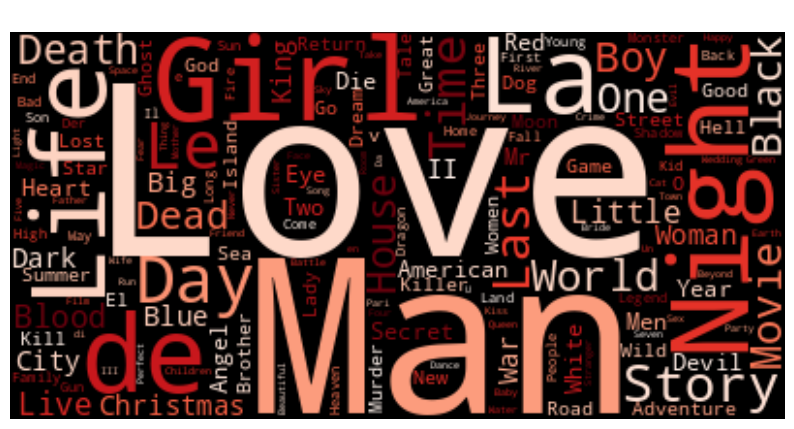

In [ ]:
titles = netflix_data['title'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()

In [ ]:
titles = netflix_data['genres'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

KeyError: 'genres'

In [ ]:
netflix_data = pd.read_csv("/content/ratings.csv")
netflix_data.head()

userId  movieId  rating     timestamp
0       1      296     5.0  1.147880e+09
1       1      306     3.5  1.147869e+09
2       1      307     5.0  1.147869e+09
3       1      665     5.0  1.147879e+09
4       1      899     3.5  1.147869e+09

In [ ]:
netflix_data.rename(columns={'old_column_name': 'rating'}, inplace=True)  #replace old_column_name with the actual name

In [ ]:
ratings       = list(netflix_data['rating'].value_counts().index)
rating_counts = list(netflix_data['rating'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Ratings Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

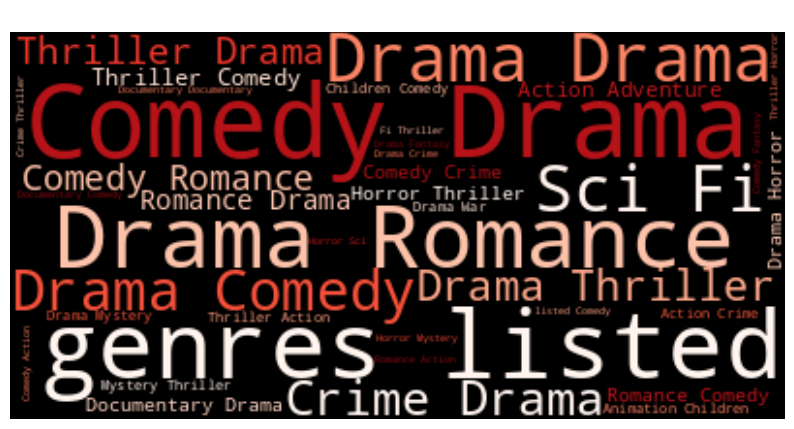

In [ ]:
titles = netflix_data['genres'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

In [ ]:
netflix_data

movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
62418                                        Drama  
62419                                  Documentary  
62420                                 Comedy|Drama  
62421                           (no genres listed)  
62422                       Action|Adventure|Drama  

[62423 rows x 3 columns]

In [ ]:
new_data = netflix_data[['movieId', 'title', 'genres', 'userId', 'rating', 'movieId', 'timestamp']]
new_data.set_index('title', inplace=True)

In [ ]:
new_data.head()

movieId  \
title                                        
Toy Story (1995)                       1.0   
Jumanji (1995)                         2.0   
Grumpier Old Men (1995)                3.0   
Waiting to Exhale (1995)               4.0   
Father of the Bride Part II (1995)     5.0   

                                                                         genres  \
title                                                                             
Toy Story (1995)                    Adventure|Animation|Children|Comedy|Fantasy   
Jumanji (1995)                                       Adventure|Children|Fantasy   
Grumpier Old Men (1995)                                          Comedy|Romance   
Waiting to Exhale (1995)                                   Comedy|Drama|Romance   
Father of the Bride Part II (1995)                                       Comedy   

                                    userId  rating movieId   timestamp  
title                                                                   
Toy Story (1995)                         1     5.0     1.0  1147880044  
Jumanji (1995)                           1     3.5     2.0  1147868817  
Grumpier Old Men (1995)                  1     5.0     3.0  1147868828  
Waiting to Exhale (1995)                 1     5.0     4.0  1147878820  
Father of the Bride Part II (1995)       1     3.5     5.0  1147868510

In [ ]:
class TextCleaner:
    def separate_text(self, texts):
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        # Check if the input is a string
        if isinstance(texts, str):
            return texts.replace(' ', '').lower()
        # If not a string, assume it's a number and convert to string then process
        else:
            return str(texts).replace(' ', '').lower()


    def remove_punc(self, texts):
        # Convert input to string first
        texts = str(texts).lower()  # Changed line
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts

In [ ]:
class TextCleaner:
    # ... other methods ...

    def remove_punc(self, texts):
        # Convert input to string first
        texts = str(texts).lower()  # Changed line
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    # ... other methods ...


In [ ]:
cleaner = TextCleaner()

In [ ]:
new_data.head()

level_0  index                               title  \
0        0      0                    toy story (1995)   
1        1      1                      jumanji (1995)   
2        2      2             grumpier old men (1995)   
3        3      3            waiting to exhale (1995)   
4        4      4  father of the bride part ii (1995)   

                                             movieId  \
0  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   
1  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   
2  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   
3  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   
4  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   

                                        genres userId rating  \
0  adventure|animation|children|comedy|fantasy      1    5.0   
1                   adventure|children|fantasy      1    3.5   
2                               comedy|romance      1    5.0   
3                         comedy|drama|romance      1    5.0   
4                                       comedy      1    3.5   

                                             movieId   timestamp  
0  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147880044  
1  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147868817  
2  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147868828  
3  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147878820  
4  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147868510

In [ ]:
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().astype(str).values), axis=1) # Changed line
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

In [ ]:
new_data.head()

level_0  index                               title  \
0        0      0                    toy story (1995)   
1        1      1                      jumanji (1995)   
2        2      2             grumpier old men (1995)   
3        3      3            waiting to exhale (1995)   
4        4      4  father of the bride part ii (1995)   

                                             movieId  \
0  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   
1  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   
2  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   
3  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   
4  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...   

                                        genres userId rating  \
0  adventure|animation|children|comedy|fantasy      1    5.0   
1                   adventure|children|fantasy      1    3.5   
2                               comedy|romance      1    5.0   
3                         comedy|drama|romance      1    5.0   
4                                       comedy      1    3.5   

                                             movieId   timestamp  
0  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147880044  
1  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147868817  
2  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147868828  
3  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147878820  
4  00title\ntoystory(1995)1.0\njumanji(1995)2.0\n...  1147868510

In [ ]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['BoW'])

In [ ]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

In [ ]:
cosine_sim

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfid, f)

In [ ]:
# ... your existing code ...

# Assuming 'new_data' is your processed DataFrame
final_data = new_data  # Assign new_data to final_data

# ... (rest of your code) ...

NameError: name 'new_data' is not defined

In [ ]:
final_data.head()

NameError: name 'final_data' is not defined

In [ ]:
final_data.to_csv('movie_data.csv',index=False)

In [ ]:
import re
class FlixHub:
    def __init__(self, df, cosine_sim):
        self.df = df
        self.cosine_sim = cosine_sim

    def recommendation(self, title, total_result=5, threshold=0.5):
        idx = self.find_id(title)
        self.df['similarity'] = self.cosine_sim[idx]
        sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_result+1]

        movies = sort_df['title'][sort_df['type'] == 'Movie']
        tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']

        similar_movies = []
        similar_tv_shows = []

        for i, movie in enumerate(movies):
            similar_movies.append('{}. {}'.format(i+1, movie))

        for i, tv_show in enumerate(tv_shows):
            similar_tv_shows.append('{}. {}'.format(i+1, tv_show))

        return similar_movies, similar_tv_shows

    def find_id(self, name):
        for index, string in enumerate(self.df['title']):
            if re.search(name, string):
                return index
        return -1

In [ ]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Blood & Water', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

NameError: name 'FlixHub' is not defined

In [ ]:
# ... your existing code ...

# Assuming 'new_data' is your processed DataFrame
final_data = new_data

# ... (FlixHub class definition should be here as well)

import re
class FlixHub:
    def __init__(self, df, cosine_sim):
        self.df = df
        self.cosine_sim = cosine_sim

    def recommendation(self, title, total_result=5, threshold=0.5):
        idx = self.find_id(title)
        self.df['similarity'] = self.cosine_sim[idx]
        sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_result+1]

        movies = sort_df['title'][sort_df['type'] == 'Movie']
        tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']

        similar_movies = []
        similar_tv_shows = []

        for i, movie in enumerate(movies):
            similar_movies.append('{}. {}'.format(i+1, movie))

        for i, tv_show in enumerate(tv_shows):
            similar_tv_shows.append('{}. {}'.format(i+1, tv_show))

        return similar_movies, similar_tv_shows

    def find_id(self, name):
        for index, string in enumerate(self.df['title']):
            if re.search(name, string):
                return index
        return -1
# Now you can use 'final_data'
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Blood & Water', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

NameError: name 'new_data' is not defined